# Music

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

In [3]:
import music21
from music21 import *
from IPython.display import Image, Audio

In [4]:
path = Path('data/composers/notewise/piano_solo/note_range62/sample_freq12')
path.ls()[:5]

[PosixPath('data/composers/notewise/piano_solo/note_range62/sample_freq12/jazz'),
 PosixPath('data/composers/notewise/piano_solo/note_range62/sample_freq12/ravel'),
 PosixPath('data/composers/notewise/piano_solo/note_range62/sample_freq12/bach'),
 PosixPath('data/composers/notewise/piano_solo/note_range62/sample_freq12/schumann'),
 PosixPath('data/composers/notewise/piano_solo/note_range62/sample_freq12/liszt')]

https://hpml2018.github.io/HPML2018_1.pdf

This paper suggests linear scaling rule does not work with RNNs. 3e-3 seems to be the magical number for 2k-8k

However, they didn't use schedule warmup, so I doubt they optimized the learning rate enough

In [5]:
bs=2048

In [6]:
data = TextLMDataBunch.load(path, bs=bs)
t = data.train_ds[0][0]
t.text[:50], t.data

('xxbos wait25 wait25 wait25 wait25 wait25 wait25 wa',
 array([  2, 124, 124, 124, ...,   9, 105,   9, 157]))

In [7]:
out = data.one_batch(); out[0].shape

torch.Size([2048, 95])

### Begin training

In [8]:
learn = language_model_learner(data, drop_mult=1, clip=.5, bptt=250)

In [9]:
learn = learn.to_fp16()

In [ ]:
# From old code
# learner.reg_fn = partial(seq2seq_reg, alpha=2, beta=1)    # Applying regularization
# learner.clip=0.3                                          # Clip the gradients  

## BS:1024 LR:5e-3

Nvidia-smi - 12271MiB

In [ ]:
learn.lr_find(num_it=1000)

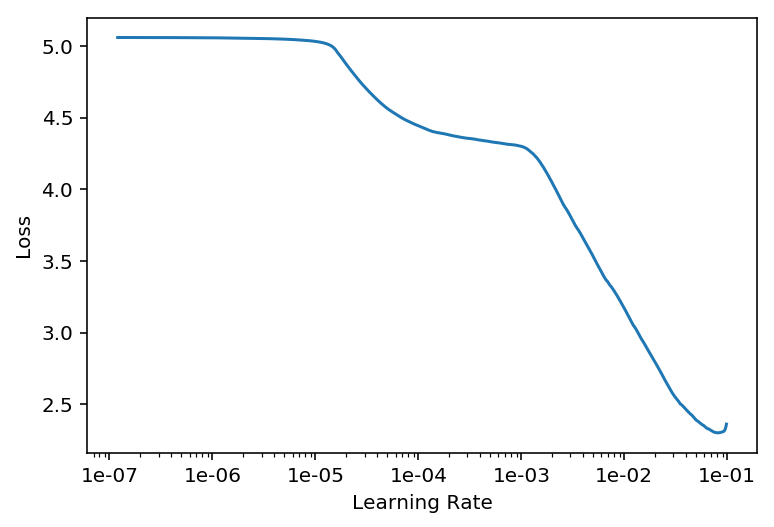

In [12]:
# with bs=512 
learn.recorder.plot(skip_end=0)

In [10]:
learn.fit_one_cycle(1, 5e-3, moms=(0.7,0.5))

epoch,train_loss,valid_loss,accuracy
1,1.284348,1.174899,0.650696


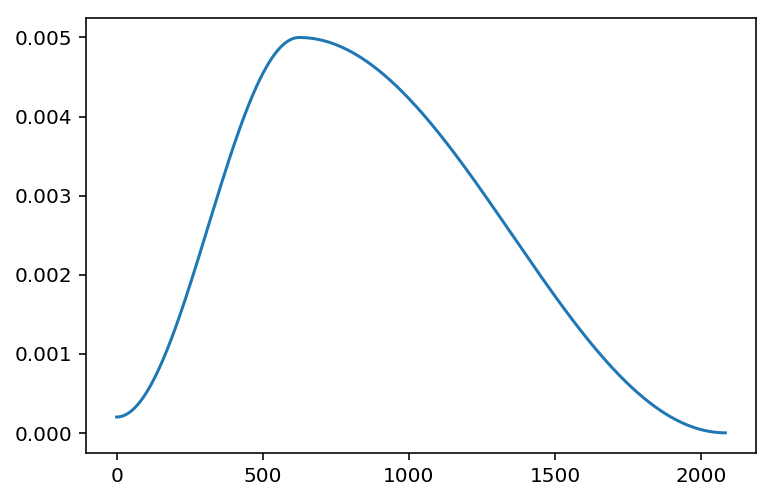

In [11]:
learn.recorder.plot_lr()

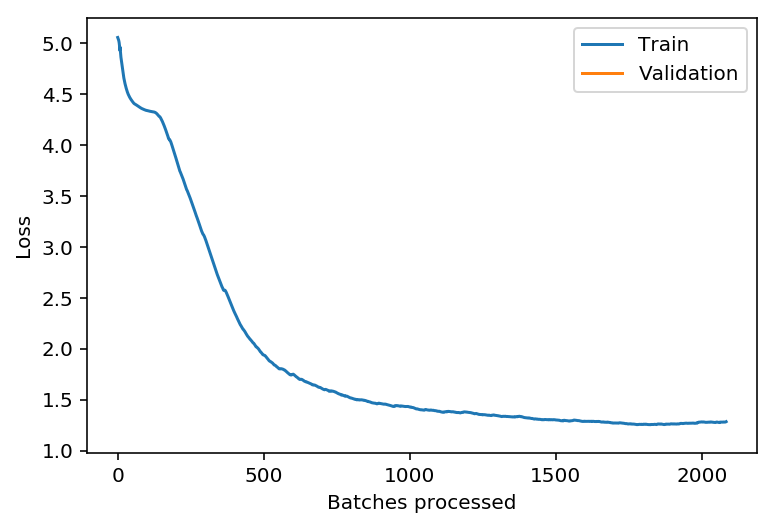

In [12]:
learn.recorder.plot_losses()

In [13]:
learn.save('bs1024_lr5en3')

In [14]:
learn.load('bs1024_lr5en3');

## BS:2048 LR:2e-2

Nvidia-smi - 12271MiB

In [11]:
learn.fit_one_cycle(1, 2e-2, moms=(0.7,0.5))

epoch,train_loss,valid_loss,accuracy
1,1.440527,1.334868,0.607893


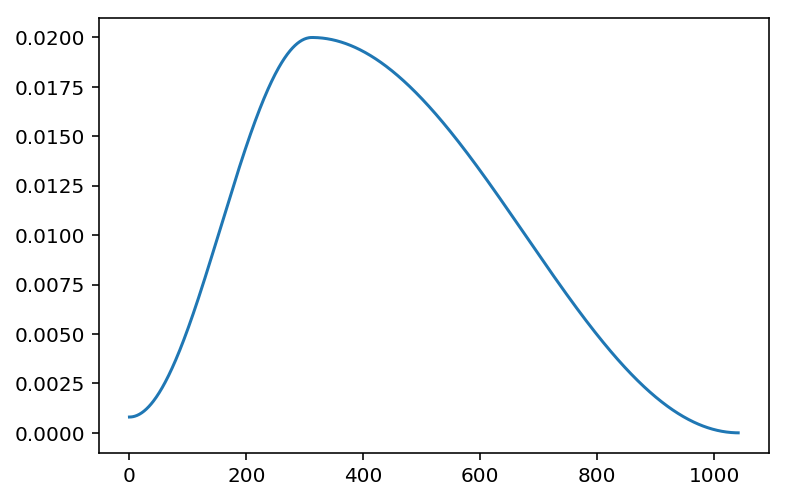

In [12]:
learn.recorder.plot_lr()

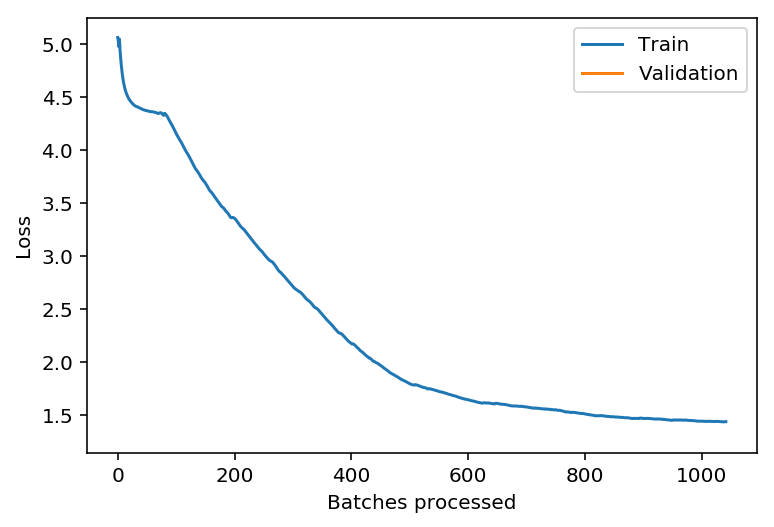

In [13]:
learn.recorder.plot_losses()

In [13]:
learn.save('bs2048_lr2en2')

In [14]:
learn.load('bs2048_lr2en2');